# Previsão de Eleição de Deputados

Neste notebook vamos usar classificadores para prever se candidatos ao cargo de Deputado Federal serão eleitos.
Para isso, usaremos os seguintes dados:

### Dados

Os dados utilizados correspondem aos das eleições de Deputado Federal nos anos de 2006, 2010 e 2014. Estão dividos nas seguintes colunas:

* **ano:** Ano da eleição;
* **sequencial_candidato:** O identificador do candidato. Corresponde à coluna Id do arquivo de submissão;
* **nome:** Nome do candidato;
* **uf:**  Sigla do estado do candidato;
* **partido:** Partido do candidato;
* **quantidade_doacoes:** Número de doações que um candidato recebeu;
* **quantidade_doadores:** Número de doadores que um candidato teve;
* **total_receita:** Total de receita de um candidato;
* **media_receita:** Média da receita de um candidato;
* **recursos_de_outros_candidatos.comites:** Total de receita proveniente de outros candidatos e comitês;
* **recursos_de_pessoas_fisicas:** Total de receita proveniente de pessoas físicas;
* **recursos_de_pessoas_juridicas:** Total de receita proveniente de pessoas juridicas;
* **recursos_proprios:** Total de receita proveniente dos próprios candidatos;
* **recursos_de_partido_politico:** Total de receita proveniente do partido do candidato;
* **quantidade_despesas:** Número de despesas que um candidato teve;
* **quantidade_fornecedores:** Número de fornecedores que um candidato teve;
* **total_despesa:** Total de depesa de um candidato;
* **media_despesa:** Média da despesa de um candidato;
* **cargo:** Cargo ao qual o candidato está concorrendo;
* **sexo:** Sexo do candidato;
* **grau:** Grau de escolaridade do candidato;
* **estado_civil:** Estado civil do candidato;
* **ocupacao:** Ocupação do candidato;
* **situacao:** Situação final do candidato. Corresponde à coluna Predict do arquivo de submissão;

Esses dados estão divididos em:

* **train.csv:** Este é o conjunto de treino que será utilizado para treinar o modelo. Para o treino serão utilizados os dados das eleições dos anos de 2006 e 2010;
* **unlabeled.csv:** Este é o conjunto, composto por uma parte dos dados de 2014, que será usado na previsão. 

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier



### Lendo e limpando dados

In [2]:
labeled = pd.read_csv("data/train.csv").drop("nome", 1).drop("uf", 1).drop("media_receita", 1).drop("media_despesa", 1).drop("cargo", 1).drop("estado_civil", 1).drop("ocupacao", 1)


df_labeled = pd.DataFrame(labeled) # load the dataset as a pandas data frame
df_labeled.head(5)
#print("#Rows and #columns", df_labeled.shape)
#df_labeled.columns


,ano,sequencial_candidato,partido,quantidade_doacoes,quantidade_doadores,total_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,sexo,grau,situacao
0,2006,10001,PT,6,6,16600.00,0.0,9000.0,6300.00,1300.0,0.0,14,14,16583.60,MASCULINO,ENSINO MÉDIO COMPLETO,nao_eleito
1,2006,10002,PT,13,13,22826.00,6625.0,15000.0,1000.00,201.0,0.0,24,23,20325.99,FEMININO,SUPERIOR COMPLETO,nao_eleito
2,2006,10002,PT,17,16,158120.80,2250.0,34150.0,62220.80,59500.0,0.0,123,108,146011.70,FEMININO,SUPERIOR COMPLETO,eleito
3,2006,10002,PRONA,6,6,3001.12,0.0,1150.0,1101.12,750.0,0.0,8,8,3001.12,MASCULINO,ENSINO MÉDIO INCOMPLETO,nao_eleito
4,2006,10003,PT,48,48,119820.00,0.0,50878.0,0.00,68942.0,0.0,133,120,116416.64,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,eleito


In [3]:
unlabeled = pd.read_csv("data/unlabeled.csv").drop("nome", 1).drop("uf", 1).drop("media_receita", 1).drop("media_despesa", 1).drop("cargo", 1).drop("estado_civil", 1).drop("ocupacao", 1)

df_unlabeled = pd.DataFrame(unlabeled) # load the dataset as a pandas data frame

df_unlabeled.head(5)
#print("#Rows and #columns", df_unlabeled.shape)
#df_unlabeled.columns

,ano,sequencial_candidato,partido,quantidade_doacoes,quantidade_doadores,total_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,sexo,grau
0,2014,10000000135,PSOL,3,3,1580.00,0.00,1500.00,0.00,0.00,80.0,3,3,1580.00,MASCULINO,ENSINO MÉDIO COMPLETO
1,2014,10000000142,PSOL,5,5,3180.00,0.00,3100.00,0.00,0.00,80.0,6,5,3130.02,MASCULINO,SUPERIOR COMPLETO
2,2014,10000000158,PSB,40,38,336793.13,1923.07,65700.00,154170.06,115000.00,0.0,145,139,326869.78,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO
3,2014,10000000161,PT,29,29,156719.32,39122.32,68783.84,17000.00,6813.16,25000.0,136,121,241016.07,MASCULINO,SUPERIOR COMPLETO
4,2014,10000000163,PT,160,146,737073.00,10000.00,347073.00,277000.00,78000.00,25000.0,518,354,567401.15,MASCULINO,SUPERIOR COMPLETO


### Balanceamento das classes

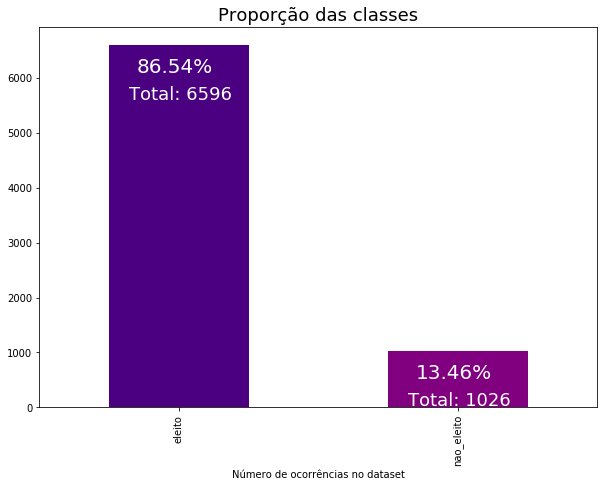

In [5]:
def plot_groups(df):
    ax = df['situacao'].value_counts().plot(kind='bar',
                                              figsize=(10,7),
                                              color=["indigo", "purple"], )

    ax.set_alpha(0.8)
    ax.set_title("Proporção das classes", fontsize=18)
    ax.set_xlabel("Número de ocorrências no dataset", fontsize=10);
    ax.set_xticklabels(["eleito", "nao_eleito"])

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.1, i.get_height()-500, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=20,
                    color='white')
        ax.text(i.get_x()+.07, i.get_height()-999, \
                "Total: " + str(i.get_height()), fontsize=18,
                    color='white')


plot_groups(df_labeled)

Como observado no gráfico acima, as classes estão desbalanceadas. Esse desbalanceamento pode tendenciar o classificador a classificar os dados como pertencentes à classe majoritária. Segundo Emerson L. M e Marcelo L. (MACHADO, Emerson Lopes. Um estudo de limpeza em base de dados desbalanceada e com sobreposiçao de classes. 2007.), classificadores gerados a partir de bases de treinamento desbalanceadas apresentam altas taxas de falsos negativos para as classes minoritárias. 

Existem basicamente duas formas de tratar o desbalanceamento de classes: 
* Atribuir custos diferenciados às classes durante a indução do modelo de classificação;
*  Reamostragem de dados (subamostragem ou sobreamostragem): Na **subamostragem**, dados da classe majoritária são removidos (desvantagem: se realizada de forma aleatória pode desprezar dados úteis), enquanto na **sobreamostragem**, dados da classe minoritária são replicados ou são gerados dados sintéticos (desvantagem:  a replicação dos exemplos tende a aumentar o custo computacional do processo).

### Reamostragem dos dados

Vamos resolver o problema de desbalanceamento com a técnica da subamostragem. Nesse caso, para manter a simplicidade, vamos remover dados da classe dos "não eleitos" de forma aleatória.

(2052, 17)

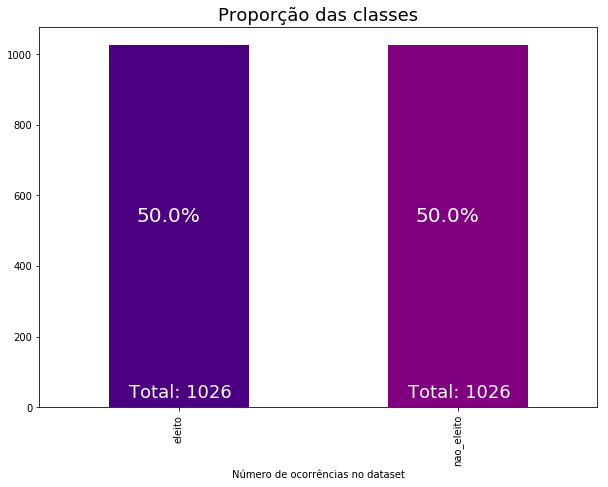

In [6]:
sample_size = 1026

elected = df_labeled[df_labeled["situacao"] == "eleito"]

not_elected = df_labeled[df_labeled["situacao"] == "nao_eleito"].sample(sample_size)

samples_array = []

samples_array.append(elected)
samples_array.append(not_elected)

df_balanced = pd.concat(samples_array)

plot_groups(df_balanced)
df_balanced.shape


### Separando os dados em treino e Validação

In [7]:
train = df_balanced.drop("situacao", 1)

df_balanced['situacao'] = df_balanced['situacao'].map({'eleito': 1, 'nao_eleito': 0})


# tranform categorical variables
train = pd.get_dummies(train)

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(train, df_balanced["situacao"], test_size=0.3) # 70% training and 30% test


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1436, 52)
(616, 52)
(1436,)
(616,)


### Cross validation + F1 score

In [8]:
def f1_cv_mean(model):
    f1 = cross_val_score(model, X_train, Y_train, scoring='f1', cv=10)
    return(f1.mean())

### Regressão Logística

In [9]:
log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(X_train, Y_train)

print(f1_cv_mean(log_reg_model))

log_reg_model.score(X_test, Y_test)


0.6295877017475895


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.637987012987013

### KNN


The optimal number of neighbors is 3


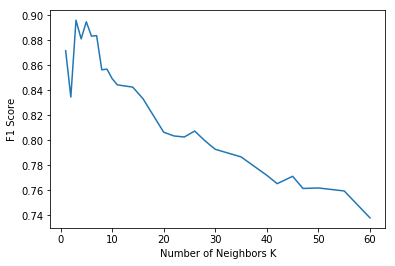

In [10]:

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,14,16,20,22,24,26,28,29,30,35,40,42,45,47,50,55,60]

# empty list that will hold cv scores
f1_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    f1 = f1_cv_mean(knn)
    f1_scores.append(f1)

# determining best k
optimal_k = neighbors[f1_scores.index(max(f1_scores))]
print("The optimal number of neighbors is %d" % optimal_k)


plt.plot(neighbors, f1_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('F1 Score')
plt.show()

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

knn_model.fit(X_train, Y_train)
f1_cv_mean(knn_model)
knn_model.score(X_test, Y_test)



0.8798701298701299

### Árvore de Decisão

In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=0)

decision_tree_model.fit(X_train, Y_train)

f1 = f1_cv_mean(decision_tree_model)

print(f1)

0.8667143290661029


### Adaboost

In [13]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X_train, Y_train)

f1 = f1_cv_mean(bdt)

print(f1)

0.9142808792193028


**Treine: um modelo de regressão logística, KNN, uma árvore de decisão e um modelo de adaboost. Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.**

Links e Referências:

* [BAR CHART ANNOTATIONS WITH PANDAS AND MATPLOTLIB](http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)

* [Um Estudo de Limpeza em Base de Dados Desbalanceada
com Sobreposição de Classes](https://www.cos.ufrj.br/~ines/enia07_html/pdf/28076.pdf)

* [Pré-processamento de dados](https://edisciplinas.usp.br/pluginfile.php/4052836/mod_resource/content/4/mineracaodadosbiologicos-parte3.pdf)
* [KNN Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
* [A Complete Guide to K-Nearest-Neighbors with Applications in Python and R](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)